In [37]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [38]:
!git clone https://github.com/ultralytics/yolov5
    


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [39]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [40]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [41]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/samarpan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-27 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [42]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [43]:
img = '/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/images/tester.jpg'

In [44]:
results = model(img)
results.print()

image 1/1: 1021x1532 5 persons, 15 cars, 4 buss, 5 trucks, 3 traffic lights
Speed: 58.2ms pre-process, 216.5ms inference, 4.2ms NMS per image at shape (1, 3, 448, 640)


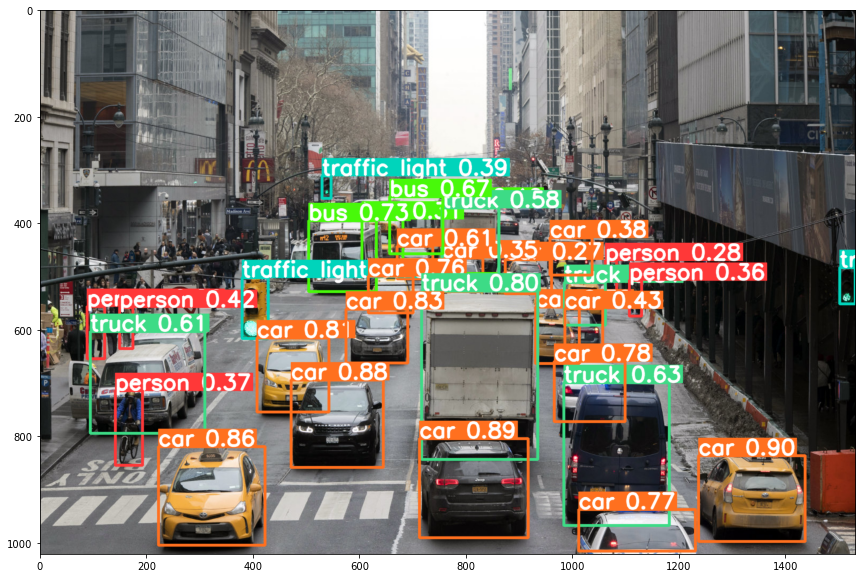

In [45]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results.render()))

plt.show()

In [46]:
results.xyxy

[tensor([[1.23615e+03, 8.36395e+02, 1.43633e+03, 9.97456e+02, 9.03800e-01, 2.00000e+00],
         [7.12554e+02, 8.04366e+02, 9.16554e+02, 9.90495e+02, 8.89779e-01, 2.00000e+00],
         [4.71484e+02, 6.94344e+02, 6.44111e+02, 8.58875e+02, 8.84194e-01, 2.00000e+00],
         [2.22496e+02, 8.19539e+02, 4.22701e+02, 1.00462e+03, 8.62561e-01, 2.00000e+00],
         [5.74958e+02, 5.61332e+02, 6.90501e+02, 6.62630e+02, 8.30696e-01, 2.00000e+00],
         [4.07556e+02, 6.15674e+02, 5.42867e+02, 7.54283e+02, 8.07446e-01, 2.00000e+00],
         [7.16141e+02, 5.27542e+02, 9.34188e+02, 8.43311e+02, 7.99769e-01, 7.00000e+00],
         [9.65977e+02, 6.59502e+02, 1.09834e+03, 7.72888e+02, 7.82973e-01, 2.00000e+00],
         [1.01127e+03, 9.37813e+02, 1.23063e+03, 1.01557e+03, 7.72787e-01, 2.00000e+00],
         [6.16932e+02, 4.99633e+02, 7.00980e+02, 5.68278e+02, 7.61454e-01, 2.00000e+00],
         [3.79333e+02, 5.02917e+02, 4.28460e+02, 6.16982e+02, 7.32326e-01, 9.00000e+00],
         [5.04055e+02

In [47]:
results.render()

[array([[[161, 157, 148],
         [152, 148, 139],
         [162, 158, 149],
         ...,
         [ 18,  18,  18],
         [ 12,  12,  12],
         [ 13,  13,  13]],
 
        [[159, 155, 146],
         [151, 147, 138],
         [161, 157, 148],
         ...,
         [ 19,  19,  19],
         [ 14,  14,  14],
         [ 14,  14,  14]],
 
        [[157, 153, 144],
         [149, 145, 136],
         [160, 156, 147],
         ...,
         [ 18,  18,  18],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        ...,
 
        [[102, 103, 105],
         [102, 103, 105],
         [104, 105, 107],
         ...,
         [166, 161, 155],
         [180, 177, 172],
         [174, 173, 169]],
 
        [[102, 103, 105],
         [103, 104, 106],
         [104, 105, 107],
         ...,
         [145, 142, 137],
         [160, 159, 154],
         [179, 178, 174]],
 
        [[104, 104, 104],
         [105, 105, 105],
         [106, 106, 106],
         ...,
         [154, 153, 149],
  

In [48]:
''''
cap = cv2.VideoCapture(0) # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()
''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-48-77c05dc9924e>, line 15)

In [49]:
import uuid   # Unique identifier
import os
import time

In [50]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [51]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.9f4f862a-3e15-11ed-9935-6e398c2a0c80.jpg


In [52]:
'''
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
            
cap.release()
cv2.destroyAllWindows()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-52-5133ed9c2637>, line 32)

In [53]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.aacb3288-3e15-11ed-9935-6e398c2a0c80.jpg


In [54]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.abfd8764-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/awake.abfd8b38-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/awake.abfd8db8-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/awake.abfd902e-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/awake.abfd92ae-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/drowsy.abfd95ce-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/drowsy.abfd981c-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/drowsy.abfd9a56-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/drowsy.abfd9ccc-3e15-11ed-9935-6e398c2a0c80.jpg
data/images/drowsy.abfda014-3e15-11ed-9935-6e398c2a0c80.jpg


In [55]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [56]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [57]:
!pip3 install pyqt5 lxml

In [58]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [59]:
#conda install nomkl

In [60]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.8.8 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.017      0.375      0.138      0.018

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/199         0G    0.09913    0.01777    0.07165         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9     0.0169      0.375     0.0278    0.00557

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     10/199         0G    0.09752     0.0209    0.07036         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9     0.0169      0.375     0.0309    0.00543

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     11/199         0G    0.09408     0.0201    0.07146         19        320: 1
          

     33/199         0G    0.07081     0.0245    0.05698         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.014          1     0.0664     0.0172

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/199         0G    0.07262    0.03182    0.05508         24        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9     0.0136          1      0.113      0.035

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/199         0G    0.07061     0.0244    0.05389         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9     0.0136          1      0.113      0.035

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/19

     58/199         0G     0.0583    0.02772     0.0433         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.424          1      0.631      0.337

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/199         0G    0.05418    0.01983    0.04165         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9       0.08       0.65     0.0997     0.0454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/199         0G    0.06613    0.02346    0.03895         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9       0.08       0.65     0.0997     0.0454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/19

     83/199         0G    0.06178    0.01671    0.03796         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.332        0.9      0.496      0.269

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/199         0G    0.05789    0.01824    0.03551         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.332        0.9      0.496      0.269

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/199         0G    0.05483    0.01874    0.03444         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.332        0.9      0.496      0.269

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/19

    108/199         0G    0.06293    0.01895    0.03473         26        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.499          1      0.686      0.144

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/199         0G    0.05168    0.01404    0.03387         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.499          1      0.686      0.144

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/199         0G    0.06153    0.01661    0.03315         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.499          1      0.686      0.144

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/19

    133/199         0G    0.03851    0.01526    0.03191         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.519          1      0.737      0.482

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/199         0G    0.04376    0.01624    0.03343         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.519          1      0.737      0.482

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/199         0G    0.04393      0.014    0.03116         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.512          1      0.739      0.523

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/19

    158/199         0G    0.03336    0.01402    0.02961         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.516          1      0.784      0.545

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/199         0G    0.04072    0.01606    0.03208         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.513          1      0.692      0.512

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    160/199         0G    0.04168    0.01349    0.03612         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.513          1      0.692      0.512

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    161/19

    183/199         0G    0.04147    0.01438    0.03024         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.518      0.977      0.783      0.551

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/199         0G    0.03584    0.01498    0.03219         23        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.518      0.977      0.783      0.551

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    185/199         0G    0.03539    0.01873    0.03156         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          9          9      0.518      0.977      0.783      0.551

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    186/19

In [62]:
#/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/Code/yolov5/runs/train/exp6/weights/last.pt
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/samarpan/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-27 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [63]:
img = os.path.join('data', 'images', 'drowsy.a28d8bbc-3dd3-11ed-b919-6e398c2a0c80.jpg')

In [64]:
#/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/Code/data/images/drowsy.a28d8bbc-3dd3-11ed-b919-6e398c2a0c80.jpg

In [65]:
results = model(img)

In [66]:
results.print()

image 1/1: 720x1280 (no detections)
Speed: 38.3ms pre-process, 199.2ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


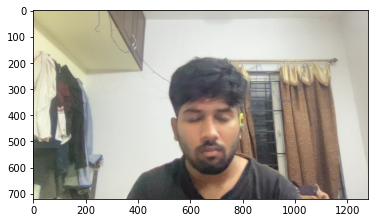

In [67]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()